#Необходимые вещи из прошлых ноутбуков

Формируем выборку XOR

In [ ]:
import numpy as np
import seaborn as sns


xor_x = np.random.rand(1000,2) * 2 - 1
print(xor_x)

[[ 0.76661218  0.24734441]
 [ 0.50188487 -0.30220332]
 [-0.46014422  0.79177244]
 ...
 [-0.79448687  0.54516053]
 [-0.72558799 -0.15141525]
 [-0.45608778 -0.39798411]]


In [ ]:
xor_targets = [np.sign(x[0] * x[1]) for x in xor_x]
print(xor_targets)
xor_targets2 = np.array([1 if np.sign(x[0] * x[1]) > 0 else 0 for x in xor_x])

[1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

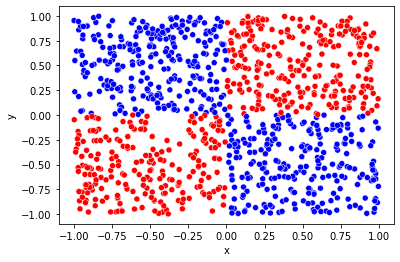

In [ ]:
import pandas as pd

df = pd.DataFrame(xor_x, columns=["x", "y"])

df["val"] = pd.Series(xor_targets).apply(lambda x: "red" if x==1 else "blue")

sns.scatterplot("x", "y", data=df, c=df["val"]).plot()

In [ ]:
xor_targets_for_net = np.array([[0, 1] if np.sign(x[0] * x[1]) > 0 else [1, 0] for x in xor_x])

In [ ]:
def BCE_loss(y, target_labels):
    eps = 1e-12
    target_label = np.argmax(target_labels)
    return -(target_label * np.log(y + eps) + (1-target_label) * np.log(1 - y + eps)).sum()

def BCE_loss_derivative(y, target_labels):
    target_label = np.argmax(target_labels)
    return (y - target_label)/(y * (1-y))

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

#Начало нового материала

#Проблемы иницализации


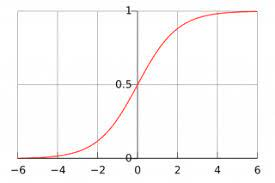

При больших значениях x сигмоида ведет себя как линейная функция, это плохо, так как нелинейность нам нужна
Если веса большие, то значения sigmoid(x) находятся в зонах насыщения - там где уже не такая большая разница между x и x+delta и функция почти линейна

#Xavier initialization

Чтобы этого избежать, предлагается xavier распределение весов:

Веса генерируются в соответствии с нормальным распределением в диапазоне [-1: 1]

Потом значение каждого веса мы умножаем на 

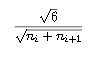

Это число появилось эмпирически

Сначала захотели поделить просто на корень из количества нейронов на слое

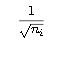

Таким образом уменьшили дисперсию, но заметили зависимость и от весов на соседнем слое, добавили image.png в знаменатель, а потом корень из 6 чтобы лучше сходилось, подобрали эмпирическим путём

In [ ]:
import numpy as np
import math


def xavier_weights(n1, n2):
    return np.random.normal(0, 1, size=(n1, n2)) * math.sqrt(6./(n1+n2))
print(xavier_weights(2,2))

[[ 1.1403625   0.34977161]
 [ 1.0840721  -0.92394501]]


In [ ]:
def usual_weights(n1, n2):
    return np.random.normal(0, 1, size=(n1, n2))
print(usual_weights(2,3))

[[-1.36928041  1.27262333 -0.99856641]
 [ 0.55753264 -0.44265541  0.08108321]]


In [ ]:
def estimate_accuracy(x, y):
    result = 0
    for i in range(len(x)):
        if np.argmax(x[i]) == np.argmax(y[i]):
            result += 1
    print("accuracy is {}".format(result/len(x) * 100))

In [ ]:

class LinearLayerUsual:
    def __init__(self, input_size, output_size, activation_function, activation_function_derivative):
        
        self.input_size = input_size
        self.output_size = output_size
        
        self.W = usual_weights(output_size, input_size)
        self.b = usual_weights(output_size, 1).reshape(output_size, )

        self.grad_W = np.zeros((output_size, input_size))
        self.grad_b = np.zeros((output_size,))
        
        self.activation_function = activation_function
        self.activation_function_derivative = activation_function_derivative
        
    def forward(self, x):
        z = self.W @ x + self.b # z^(l+1) = W^(l)*h^(l) + b^(l)
        h = self.activation_function(z) # h^(l) = f(z^(l))
        return h, z
    
    def backward(self, delta_next, z, w_next):
        return w_next.T @ delta_next * self.activation_function_derivative(z)

    def backward_as_last_layer(self, loss_der, z):
        return self.activation_function_derivative(z) * loss_der
    
    def clear_grad(self):
        self.grad_W = np.zeros((self.output_size, self.input_size))
        self.grad_b = np.zeros((self.output_size,))


In [ ]:

class LinearLayerXavier:
    def __init__(self, input_size, output_size, activation_function, activation_function_derivative):
        
        self.input_size = input_size
        self.output_size = output_size
        
        self.W = xavier_weights(output_size, input_size)
        self.b = xavier_weights(output_size, 1).reshape(output_size, )
            
        self.grad_W = np.zeros((output_size, input_size))
        self.grad_b = np.zeros((output_size,))
        
        self.activation_function = activation_function
        self.activation_function_derivative = activation_function_derivative
        
    def forward(self, x):
        z = self.W @ x + self.b # z^(l+1) = W^(l)*h^(l) + b^(l)
        h = self.activation_function(z) # h^(l) = f(z^(l))
        return h, z
    
    def backward(self, delta_next, z, w_next):
        return w_next.T @ delta_next * self.activation_function_derivative(z)

    def backward_as_last_layer(self, loss_der, z):
        return self.activation_function_derivative(z) * loss_der
    
    def clear_grad(self):
        self.grad_W = np.zeros((self.output_size, self.input_size))
        self.grad_b = np.zeros((self.output_size,))


In [ ]:
import tqdm


class NNUsual:
    def __init__(self, structure, loss, loss_derivative):
        self.structure = structure
        self.layers = []
        self.loss = loss
        self.loss_derivative = loss_derivative
        for i in range(1, len(structure)):
            self.layers.append(LinearLayerUsual(structure[i-1], structure[i], sigmoid, sigmoid_deriv))
        
    def apply(self, x):
        h_array = [x]
        z_array = []
        for layer in self.layers:
            h, z = layer.forward(h_array[-1])
            h_array.append(h)
            z_array.append(z)
        return h_array[-1]
    
    def forward(self, x):
        h_array = [x]
        z_array = []
        for layer in self.layers:
            h, z = layer.forward(h_array[-1])
            h_array.append(h)
            z_array.append(z)        
        return h_array, z_array
    
    def clear_grad_values(self):
        for layer in self.layers:
            layer.clear_grad()
    
    def train(self, X, y, iter_num = 500, alpha = 0.1):
        cnt = 0
        m = len(y)
        avg_cost_func = []     
        for _ in tqdm.tqdm(range(iter_num)):    
            avg_cost = 0
            self.clear_grad_values()
            for i in range(len(y)):
                # perform the feed forward pass and return the stored h and z values, to be used in the
                # gradient descent step
                
                # one sample per time
                h, z = self.forward(X[i, :])             

                # backward pass
                grads = {}
                for layer_num, layer in reversed(list(enumerate(self.layers))):
                    if layer_num == len(self.layers) - 1:
                        loss_deriv = self.loss_derivative(h[-1], y[i,:])
                        grads[layer_num+1] = loss_deriv
                        avg_cost += self.loss(h[-1], y[i,:])
                        grads[layer_num] = layer.backward_as_last_layer(loss_deriv, z[layer_num])
                    else:
                        grads[layer_num] = layer.backward(grads[layer_num+1], z[layer_num], self.layers[layer_num+1].W)
                    layer.grad_W += grads[layer_num][:,np.newaxis] @ np.transpose(h[layer_num][:,np.newaxis])
                    layer.grad_b += grads[layer_num]
                        
            # update weights
            for layer in self.layers:
                layer.W -= alpha * (layer.grad_W / m)
                layer.b -= alpha * (layer.grad_b / m)
                
            # complete the average cost calculation
            avg_cost = 1.0 / m * avg_cost
            avg_cost_func.append(avg_cost)
            
        return avg_cost_func

In [ ]:
import tqdm


class NNXavier:
    def __init__(self, structure, loss, loss_derivative):
        self.structure = structure
        self.layers = []
        self.loss = loss
        self.loss_derivative = loss_derivative
        for i in range(1, len(structure)):
            self.layers.append(LinearLayerXavier(structure[i-1], structure[i], sigmoid, sigmoid_deriv))
        
    def apply(self, x):
        h_array = [x]
        z_array = []
        for layer in self.layers:
            h, z = layer.forward(h_array[-1])
            h_array.append(h)
            z_array.append(z)
        return h_array[-1]
    
    def forward(self, x):
        h_array = [x]
        z_array = []
        for layer in self.layers:
            h, z = layer.forward(h_array[-1])
            h_array.append(h)
            z_array.append(z)        
        return h_array, z_array
    
    def clear_grad_values(self):
        for layer in self.layers:
            layer.clear_grad()
    
    def train(self, X, y, iter_num = 500, alpha = 0.1):
        cnt = 0
        m = len(y)
        avg_cost_func = []     
        for _ in tqdm.tqdm(range(iter_num)):    
            avg_cost = 0
            self.clear_grad_values()
            for i in range(len(y)):
                # perform the feed forward pass and return the stored h and z values, to be used in the
                # gradient descent step
                
                # one sample per time
                h, z = self.forward(X[i, :])             

                # backward pass
                grads = {}
                for layer_num, layer in reversed(list(enumerate(self.layers))):
                    if layer_num == len(self.layers) - 1:
                        loss_deriv = self.loss_derivative(h[-1], y[i,:])
                        grads[layer_num+1] = loss_deriv
                        avg_cost += self.loss(h[-1], y[i,:])
                        grads[layer_num] = layer.backward_as_last_layer(loss_deriv, z[layer_num])
                    else:
                        grads[layer_num] = layer.backward(grads[layer_num+1], z[layer_num], self.layers[layer_num+1].W)
                    layer.grad_W += grads[layer_num][:,np.newaxis] @ np.transpose(h[layer_num][:,np.newaxis])
                    layer.grad_b += grads[layer_num]
                        
            # update weights
            for layer in self.layers:
                layer.W -= alpha * (layer.grad_W / m)
                layer.b -= alpha * (layer.grad_b / m)
                
            # complete the average cost calculation
            avg_cost = 1.0 / m * avg_cost
            avg_cost_func.append(avg_cost)
            
        return avg_cost_func

100%|██████████| 2000/2000 [05:26<00:00,  6.12it/s]


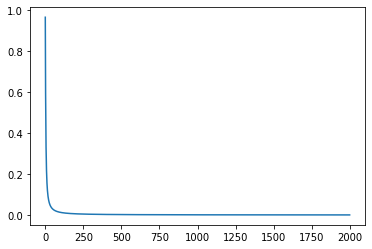

In [ ]:
np.random.seed(1)

N_bce_usual = NNUsual([2,4,4,4,1], BCE_loss, BCE_loss_derivative)

avg_cost_func_usual = N_bce_usual.train(xor_x, xor_targets2.reshape(-1, 1), 2000, 0.25)

sns.lineplot(data=avg_cost_func_usual)
# get the prediction accuracy and print

100%|██████████| 2000/2000 [05:29<00:00,  6.08it/s]


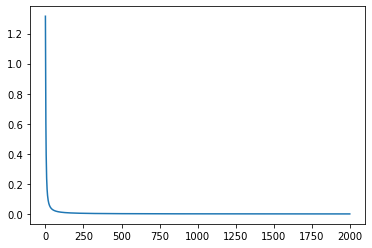

In [ ]:
np.random.seed(1)

N_bce_xavier = NNXavier([2,4,4,4,1], BCE_loss, BCE_loss_derivative)

avg_cost_func_xavier = N_bce_xavier.train(xor_x, xor_targets2.reshape(-1, 1), 2000, 0.25)
        
sns.lineplot(data=avg_cost_func_xavier)
# get the prediction accuracy and print

In [ ]:
avg_cost_func_xavier = np.array(avg_cost_func_xavier)
avg_cost_func_usual = np.array(avg_cost_func_usual)

print(avg_cost_func_xavier.mean(), avg_cost_func_xavier.sum(), avg_cost_func_xavier[-1])
print(avg_cost_func_usual.mean(), avg_cost_func_usual.sum(), avg_cost_func_usual[-1])

0.00617650695998251 12.35301391996502 0.00047996357951515534
0.005649980193054833 11.299960386109666 0.00048014007272031555


Инициализация "He" подходит для активации ReLU 